<a href="https://colab.research.google.com/github/H-POOJA/GLASS-IDENTIFICATION/blob/main/decision_tree_classifier_on_glass_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler

# Import dataset

In [3]:
df=pd.read_csv('/glass.csv')

# Exploratory data analysis

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


##### Missing values in variables

In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

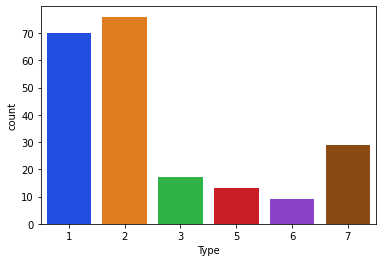

In [ ]:
sns.countplot(x="Type", data=df, palette='bright')
plt.show()

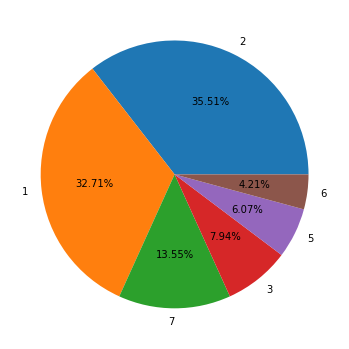

In [ ]:
plt.figure(figsize=(6, 8))
plt.pie(df['Type'].value_counts().values, labels= df['Type'].value_counts().index,autopct='%1.2f%%')
plt.show()

# Frequency distribution of values in variables

In [ ]:
num_cols=df._get_numeric_data().columns

print(num_cols)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


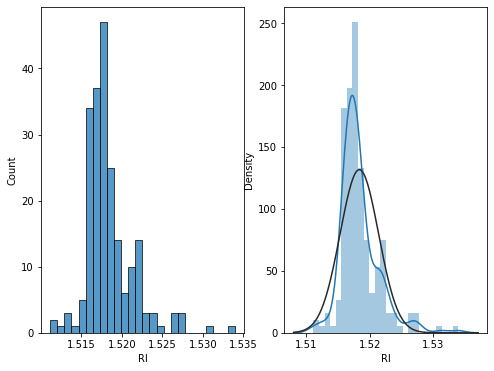

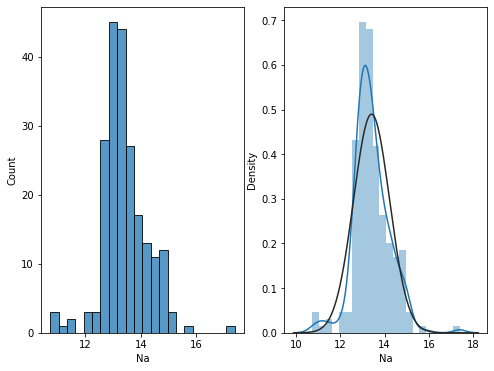

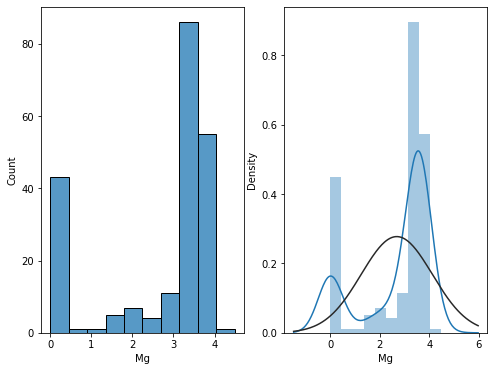

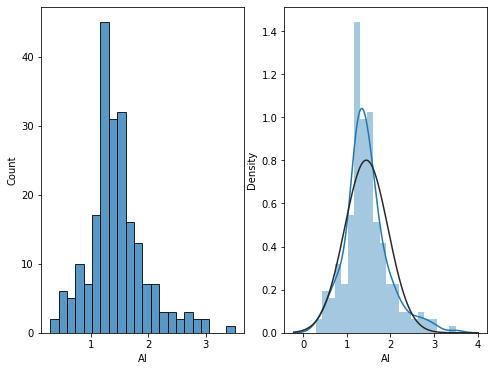

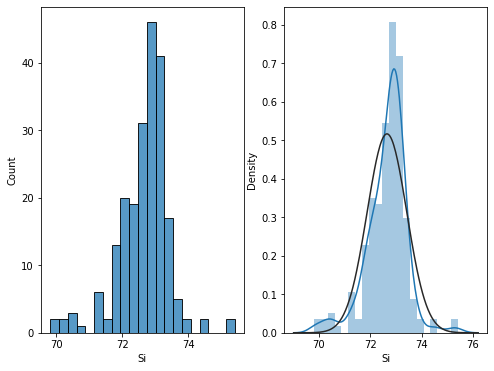

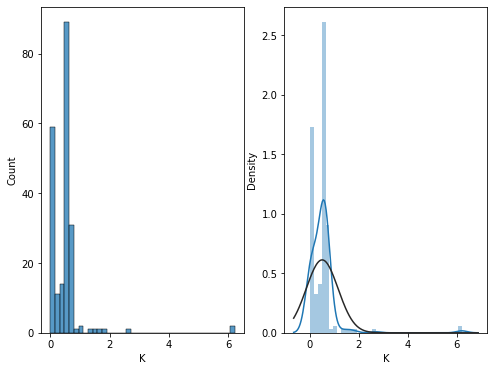

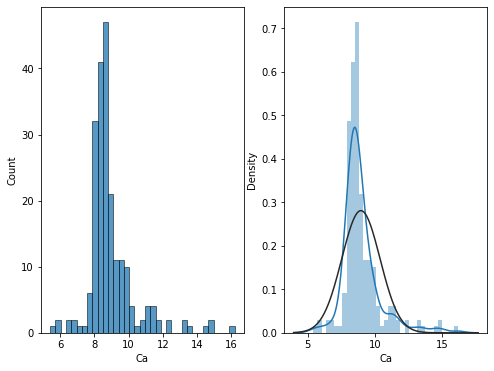

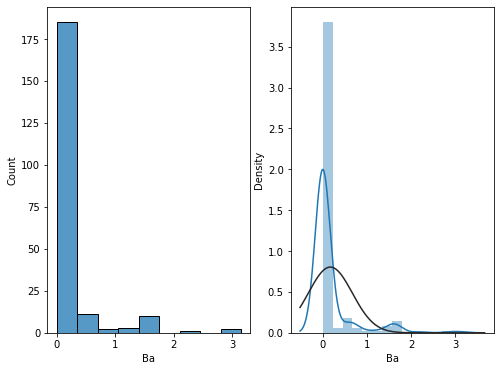

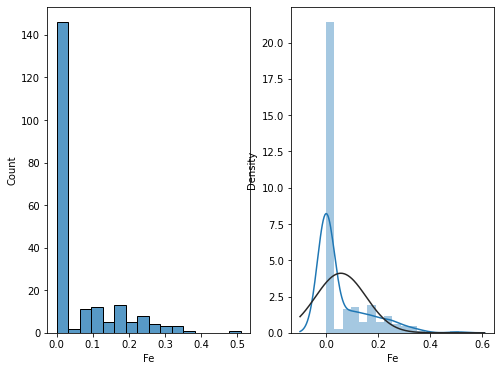

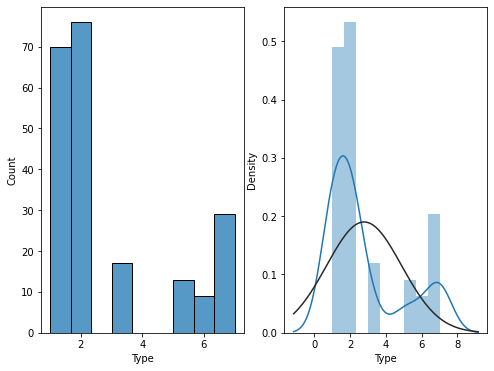

In [ ]:
for col in num_cols:
    fig, axes=plt.subplots(figsize=(8, 6), nrows=1, ncols=2)
    sns.histplot(df[col], ax=axes[0])
    sns.distplot(df[col], ax=axes[1], fit=stats.norm)
    plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


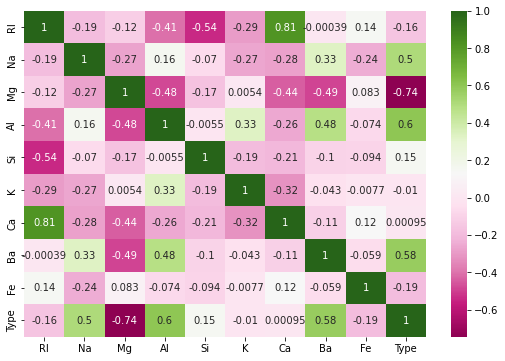

In [ ]:
cor = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data = cor, annot = True, cmap = 'PiYG')
plt.show()

### Declare feature vector and target variable

In [ ]:
columns=list(df.columns)
columns.remove('Type')

In [ ]:
X=df.drop('Type', axis=1)
Y=df['Type']

##### Split data into separate training and test set

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.20, random_state=42)

### Scaler

In [ ]:
sc=StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train=pd.DataFrame(X_train, columns=columns)
X_test=pd.DataFrame(X_test, columns=columns)

# Model Building

##### Decision Tree Classifier with criterion gini index

In [ ]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

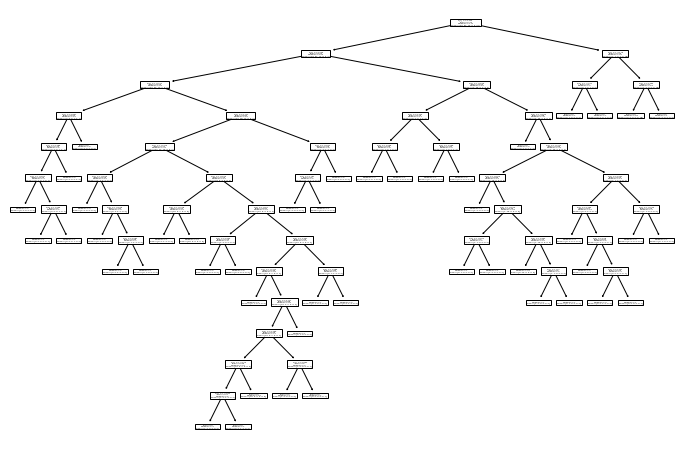

In [ ]:
plt.figure(figsize=(12,8))

tree.plot_tree(dt_gini.fit(X_train, Y_train))
plt.show()

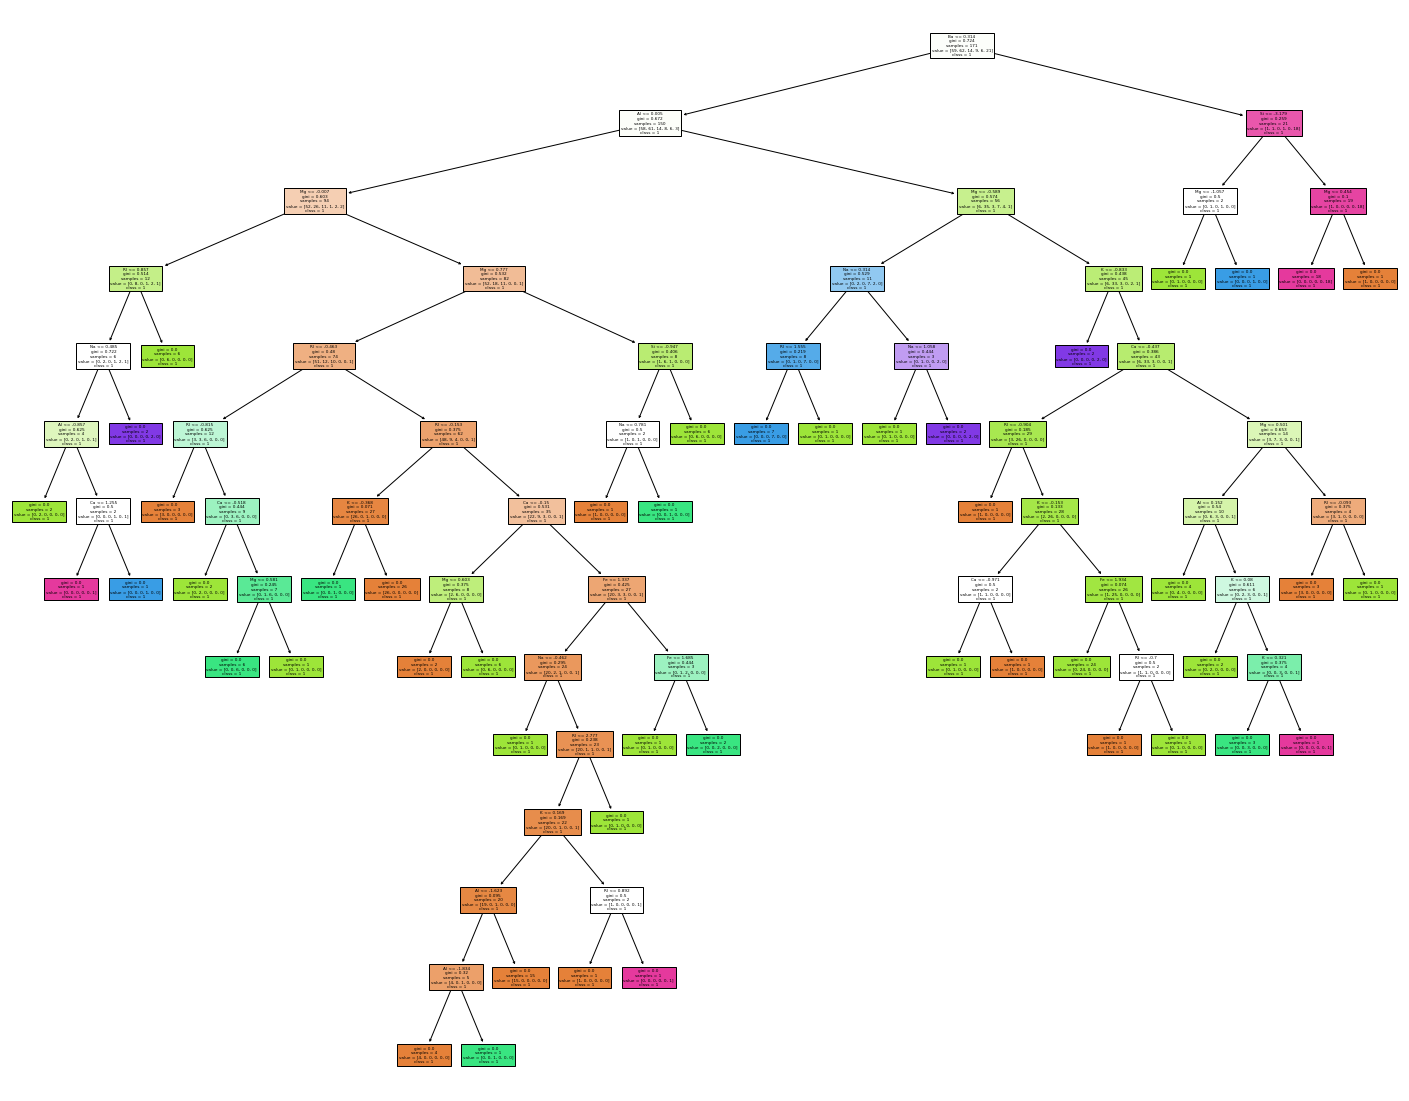

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_gini,
                   feature_names=X.columns,
                   class_names=Y_train.astype(str),
                   filled=True)

##### Compare the train-set and test-set accuracy

In [ ]:
Y_train_pred=dt_gini.predict(X_train)
Y_test_pred=dt_gini.predict(X_test)

print('Training-set accuracy score', accuracy_score(Y_train, Y_train_pred))
print('Testing-set accuracy score', accuracy_score(Y_test, Y_test_pred))

Training-set accuracy score 1.0
Testing-set accuracy score 0.7441860465116279


In [ ]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        21

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [ ]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.75      0.43      0.55        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.73      1.00      0.84         8

    accuracy                           0.74        43
   macro avg       0.82      0.79      0.78        43
weighted avg       0.77      0.74      0.73        43



### Overfitting and underfitting

In [ ]:
values=[i for i in range(1, 21)]
train_scores, test_scores=[], []

for i in values:
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, Y_train)
    
    Y_tr_pred=dt.predict(X_train)
    Y_te_pred=dt.predict(X_test)
    
    train_scores.append(accuracy_score(Y_train, Y_tr_pred))
    test_scores.append(accuracy_score(Y_test, Y_te_pred))

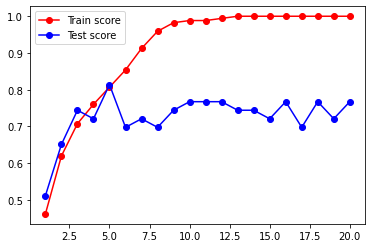

In [ ]:
plt.plot(values, train_scores, '-o', color='red', label='Train score')
plt.plot(values, test_scores, '-o', color='blue', label='Test score')
plt.legend()
plt.show()

# Model Tuning

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt=DecisionTreeClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = 'accuracy')

In [ ]:
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015622,0.000000,0.000000,0.000000,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.488372,0.511628,0.488372,0.547619,0.508998,0.024235,30
1,0.023429,0.013528,0.011716,0.006764,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.604651,0.511628,0.488372,0.547619,0.538068,0.043856,22
2,0.019524,0.006763,0.000000,0.000000,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.511628,0.534884,0.674419,0.523810,0.561185,0.065891,15
3,0.011716,0.006764,0.023433,0.023432,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.465116,0.441860,0.418605,0.500000,0.456395,0.030070,31
4,0.009770,0.010156,0.016502,0.015414,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.372093,0.372093,0.348837,0.357143,0.362542,0.009993,41


In [ ]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)


In [ ]:
dt_grid=grid_search.best_estimator_
dt_grid.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

In [ ]:
Y_train_pred=dt_grid.predict(X_train)
Y_test_pred=dt_grid.predict(X_test)

print('Training-set accuracy score', accuracy_score(Y_train, Y_tr_pred))
print('Testing-set accuracy score', accuracy_score(Y_test, Y_te_pred))

Training-set accuracy score 1.0
Testing-set accuracy score 0.7674418604651163


In [ ]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        59
           2       0.80      0.84      0.82        62
           3       0.80      0.57      0.67        14
           5       1.00      0.56      0.71         9
           6       0.50      1.00      0.67         6
           7       0.94      0.71      0.81        21

    accuracy                           0.80       171
   macro avg       0.81      0.75      0.75       171
weighted avg       0.81      0.80      0.79       171



In [ ]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.91      0.71      0.80        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       0.60      1.00      0.75         3
           7       1.00      1.00      1.00         8

    accuracy                           0.79        43
   macro avg       0.86      0.74      0.74        43
weighted avg       0.85      0.79      0.79        43

